# Aula 3 - Seaborn

[Documentação Seaborn](https://seaborn.pydata.org/tutorial/introduction.html)

### Imports e Configurações

In [17]:
# importando a biblioteca
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
np.mean([1,2,3])

2.0

In [5]:
# definindo as configurações

# autoreload permite a recarga dos módulos antes da execução dos códigos
# doc: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%reload_ext autoreload
%autoreload 2

# magic function do matplotlib para renderizar gráficos estáticos logo abaixo,
# no output do jupyter, fazendo a junção do backend do matplotlib com front-end
# do jupyter notebook
%matplotlib inline

# define o estilo
sns.set_style('white')


### Carregando as Bases de Dados

In [19]:
# importando a base 'flights' do seaborn

flights =sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [20]:
# importando a base 'penguins' do seaborn
peng = sns.load_dataset('penguins')


### Gráficos

Processo de plotagem:
1. entender os dados
2. entender a questão de negócio
3. ~~realizar as transformações necessárias~~
4. realizar o plot

Documentação:

* https://seaborn.pydata.org/tutorial/function_overview.html#figure-level-vs-axes-level-functions
* https://seaborn.pydata.org/api.html#function-interface

#### Gráfico de Barras

In [25]:
# observando a base de dados

peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Qual a quantidade de pinguins por ilha?

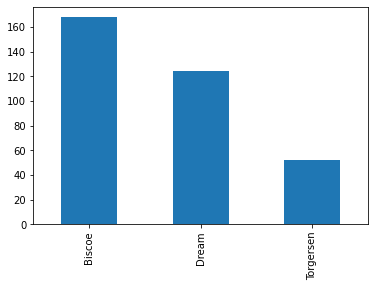

In [26]:
# como seria com plot do pandas?

peng['island'].value_counts().plot.bar()
plt.show()


In [28]:
peng['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

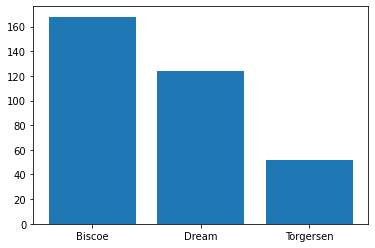

In [29]:
# como seria com plot do matplotlib?
x_bar = peng['island'].value_counts().index
y_bar = peng['island'].value_counts().values
plt.bar(x_bar, y_bar)
plt.show()


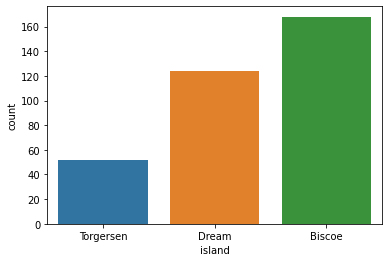

In [30]:
# visualizando com o seaborn - countplot

sns.countplot(data=peng, x='island', order=peng['island'].value_counts(ascending=True).index)
plt.show()


Qual a quantidade de pinguins por ilha e segmentado por sexo?

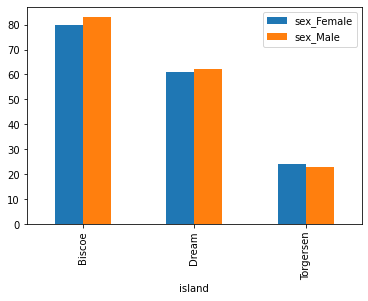

In [32]:
# como seria com pandas plot?

pd.get_dummies(peng, columns=['sex']) \
    .groupby('island')[['sex_Female', 'sex_Male']] \
    .sum() \
    .plot(kind='bar')
    
plt.show()


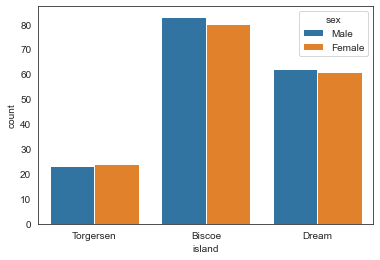

In [14]:
# visualizando com o seaborn - countplot
sns.countplot(data=peng, x='island', hue='sex')
plt.show()


Qual a média do comprimento da nadadeira por ilha, segmentado por espécie?

In [33]:
# mudando o estilo para darkgrid

sns.set_style('darkgrid')

In [34]:
# base de dados pinguins

peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


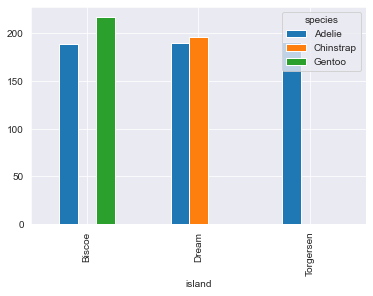

In [35]:
# utilizando o pandas plot
peng.groupby(['island', 'species'])['flipper_length_mm'] \
    .mean() \
    .reset_index() \
    .pivot('island', 'species', 'flipper_length_mm') \
    .plot.bar()

plt.show()


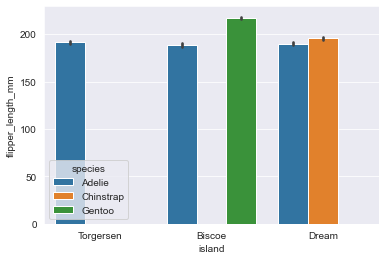

In [38]:
# utilizando o seaborn - barplot
sns.barplot(data=peng, x='island', y='flipper_length_mm', hue='species', estimator=np.mean)
plt.show()

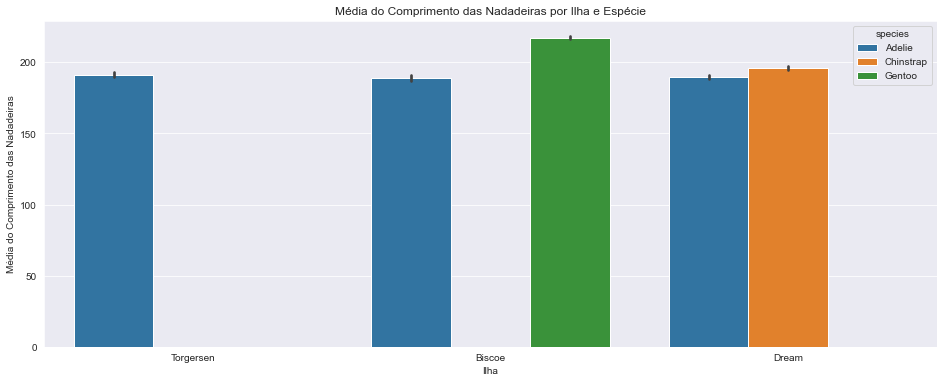

In [40]:
# adicionando título, rótulos de eixo, ajustando legenda e tamanho

plt.figure(figsize=(16,6))

# transformações e plot

sns.barplot(data=peng, x='island', y='flipper_length_mm', hue='species', estimator=np.mean)

# Estética
plt.title('Média do Comprimento das Nadadeiras por Ilha e Espécie')
plt.xlabel('Ilha')
plt.ylabel('Média do Comprimento das Nadadeiras')


# show
plt.show()


#### Gráfico de Linhas

In [32]:
# base de dados flights
flights.head()



,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Qual a quantidade de passageiros por ano?

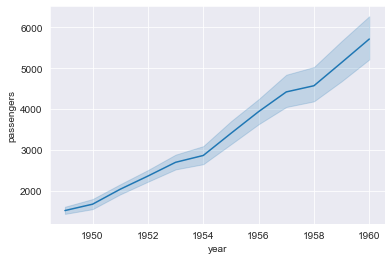

In [35]:
# visualizando o total de passageiros por ano com seaborn - lineplot

sns.lineplot(data=flights, x='year', y='passengers', estimator='sum')
plt.show()

Qual a média de passageiros por ano?

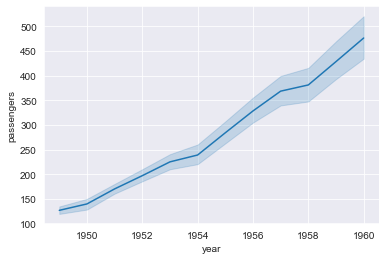

In [36]:
# visualizando a média de passageiros por ano com seaborn - lineplot

sns.lineplot(data=flights, x='year', y='passengers', estimator='mean')
plt.show()

Qual a quantidade de passageiros por ano, segmentado por mês?

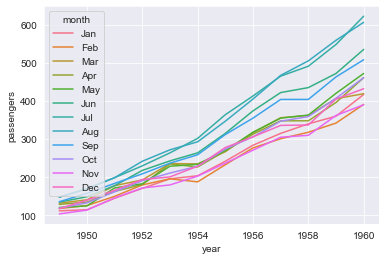

In [37]:
# visualizando com seaborn - lineplot

sns.lineplot(data=flights, x='year', y='passengers', hue='month', estimator='sum')
plt.show()

#### Gráfico de Caixa

In [38]:
# base de dados penguins
peng.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Temos outliers no peso corporal dos pinguins?

<AxesSubplot:xlabel='sex', ylabel='body_mass_g'>

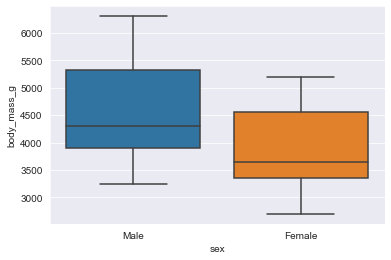

In [43]:
# visualizando a distibuição com seaborn - boxplot
sns.boxplot(data=peng, x='sex', y='body_mass_g' )


<AxesSubplot:xlabel='sex', ylabel='body_mass_g'>

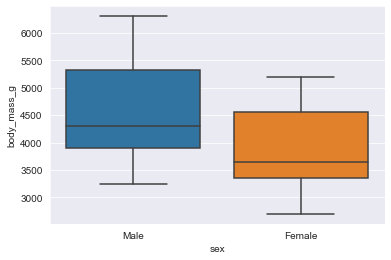

In [41]:
# segmentando a distribuição por sexo

sns.boxplot(data=peng, x='sex', y='body_mass_g' )


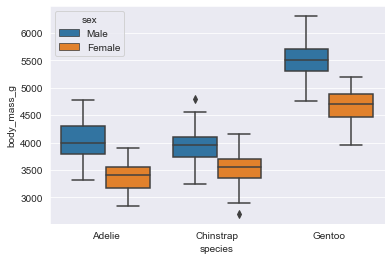

In [44]:
# segmentando a distribuição por sexo e espécie

sns.boxplot(data=peng, y='body_mass_g', x='species', hue='sex')
plt.show()

#### Gráfico de Dispersão

In [44]:
# base de dados pinguins
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<AxesSubplot:xlabel='bill_depth_mm', ylabel='bill_length_mm'>

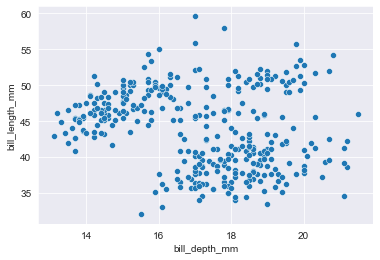

In [46]:
# visualizando com seaborn - scatterplot
sns.scatterplot(data=peng, 
x='bill_depth_mm',
y='bill_length_mm')


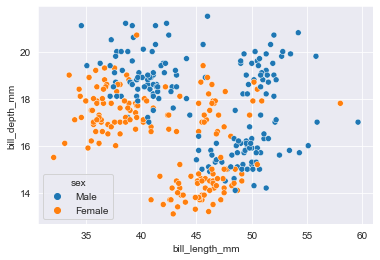

In [46]:
# segmentando por sexo
sns.scatterplot(data=peng,
                x='bill_length_mm',
                y='bill_depth_mm',
                hue='sex')

plt.show()



<AxesSubplot:xlabel='bill_depth_mm', ylabel='bill_length_mm'>

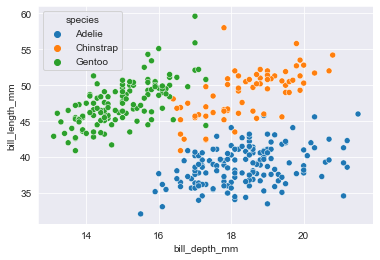

In [45]:
# segmentando por espécie

sns.scatterplot(data=peng, 
x='bill_depth_mm',
y='bill_length_mm', hue='species')

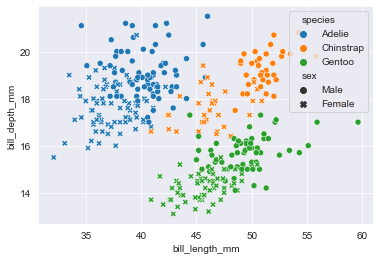

In [47]:
# segmentando por espécie e sexo com o parâmetro style

sns.scatterplot(data=peng,
                x='bill_length_mm',
                y='bill_depth_mm',
                hue='species',
                style='sex')

plt.show()

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

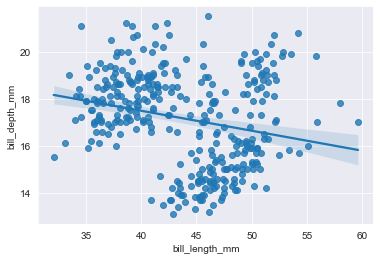

In [48]:
# visualizando com seaborn - regplot

sns.regplot(data=peng, 
y='bill_depth_mm',
x='bill_length_mm')

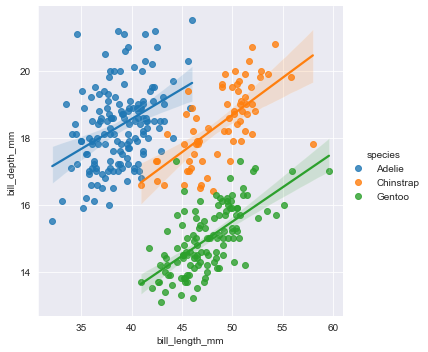

In [49]:
# visualizando com seaborn - lmplot
# segmentando por espécie

sns.lmplot(data=peng, 
y='bill_depth_mm',
x='bill_length_mm', hue='species')


#### Pairplot para Analise Exploratória

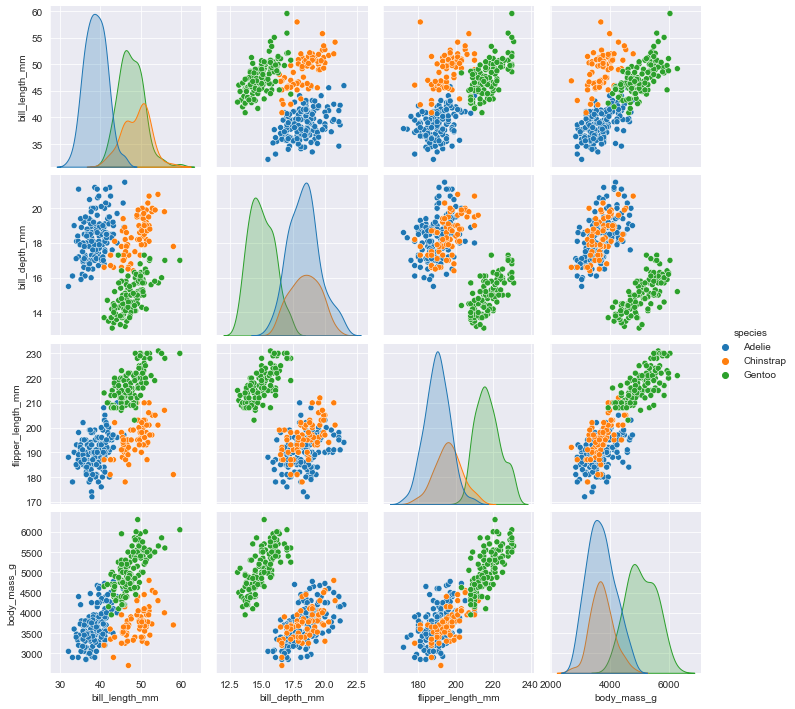

In [53]:
# Observando a relação entre todas variáveis numéricas
sns.pairplot(peng, hue='species')
plt.show()


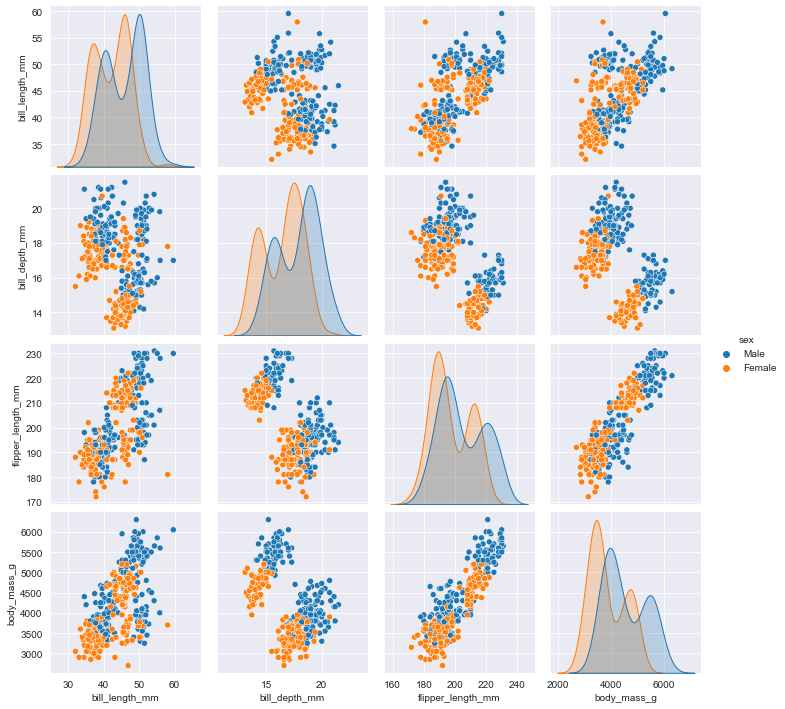

In [51]:
# Observando a relação entre todas variáveis numéricas segmentado por sexo

sns.pairplot(peng, hue='sex')
plt.show()

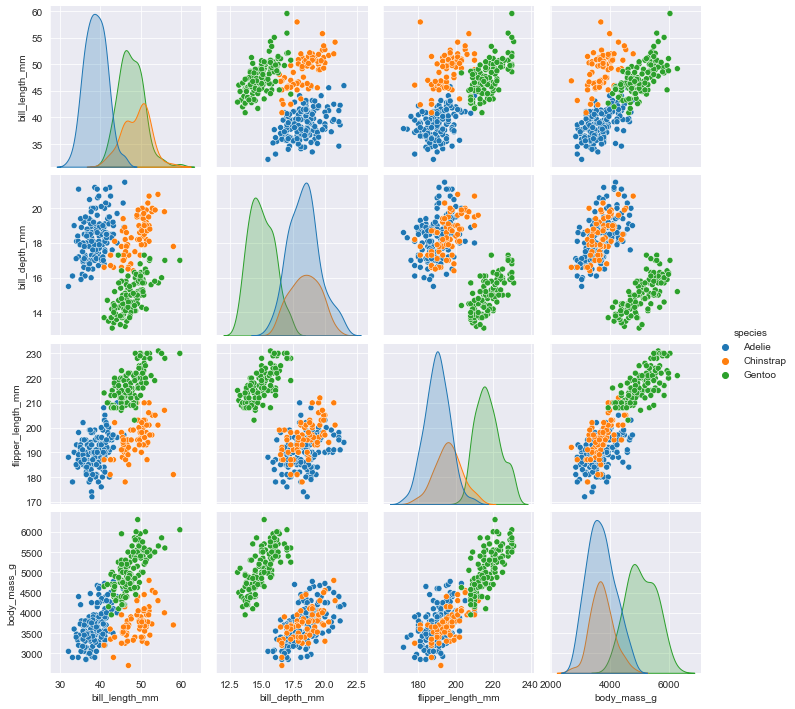

In [52]:
# Observando a relação entre todas variáveis numéricas segmentado por espécie

sns.pairplot(peng, hue='species')
plt.show()


### Atividade

Resolver as questões abaixo. Em seguida, criar um repositório público no GitHub e armazenar no notebook criado, enviando somente o link do NOTEBOOK para o [Formulário](https://docs.google.com/forms/d/e/1FAIpQLSf8IUCLt4kowhHhB3SRQofE2I8NuXuDadBYjRHqUxgb3yWOaQ/viewform).

Para resolver as questões abaixo utilizar o dataset 'tips' do seaborn.

*According to the tips dataset documentation, the Tips dataset is a data frame with 244 rows and 7 variables which represents some tipping data where one waiter recorded information about each tip he received over a period of a few months working in one restaurant. In all the waiter recorded 244 tips. The data was reported in a collection of case studies for business statistics (Bryant & Smith 1995).[4] The waiter collected several variables: The **tip** in dollars, the **bill** in dollars, the **sex** of the bill payer, whether there were **smokers** in the party, the **day** of the week, the **time** of day and the **size** of the party.*

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
tips=sns.load_dataset('tips')
tips.head

<bound method NDFrame.head of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


#### Questão 1

Qual o valor médio da gorjeta (*tip*) de acordo com o dia da semana (*day*)?

<AxesSubplot:title={'center':'Valor médio da gorjeta por dia da semana'}, xlabel='day', ylabel='tip'>

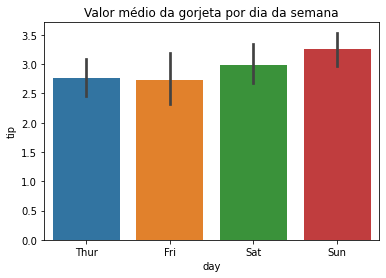

In [11]:
# Estética
plt.title('Valor médio da gorjeta por dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Valor médio da gorjeta')

# show

sns.barplot(data=tips, x='day', y='tip', estimator=np.mean)



#### Questão 2

Qual a soma das gorjetas (*tip*) por turno do dia (*time*), observando os fumantes e não fumantes (*smoker*)?

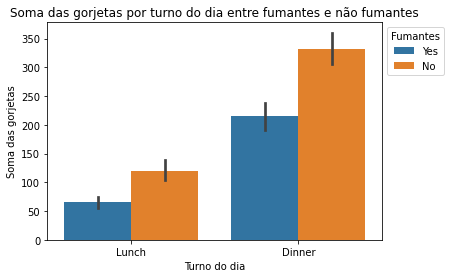

In [14]:
sns.barplot(data=tips, x='time', y='tip', hue='smoker', estimator=np.sum)
plt.title('Soma das gorjetas por turno do dia entre fumantes e não fumantes')
plt.xlabel('Turno do dia')
plt.ylabel('Soma das gorjetas')
plt.legend(title='Fumantes', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

#### Questão 3

Verique a distribuição de gorjetas (*tip*) por dia (*day*) e turno (*time*). Há algum dia e turno com maior presença de outliers?

In [15]:
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='day', ylabel='tip'>

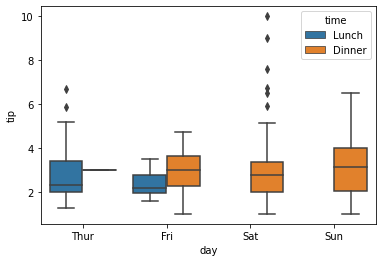

In [22]:
sns.boxplot(data=tips, x='day',y='tip', hue='time')

#### Questão 4

Qual a relação do valor total da conta com o valor da gorjeta?

In [25]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='tip', ylabel='total_bill'>

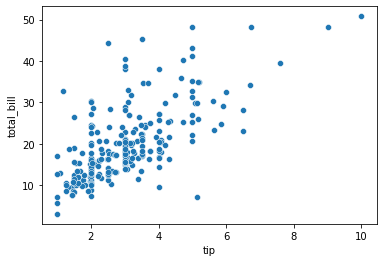

In [26]:
sns.scatterplot(data=tips, x='tip', y='total_bill')

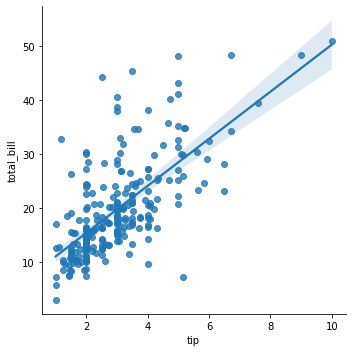

In [28]:
sns.lmplot(data=tips, x='tip', y='total_bill')

#### Questão 5

Qual público dá maior quantidade de gorjetas:


1.   Homens ou mulheres?
2.   Fumantes ou não fumantes?



In [29]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='sex', ylabel='count'>

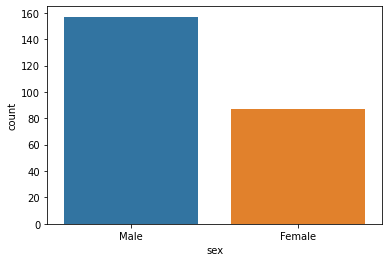

In [30]:
sns.countplot(data=tips, x='sex')

<AxesSubplot:xlabel='smoker', ylabel='count'>

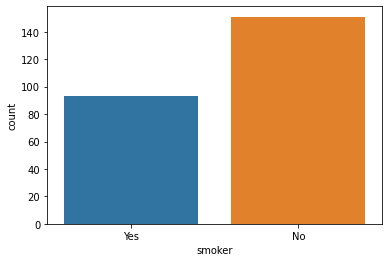

In [31]:
sns.countplot(data=tips, x='smoker')